# Problem

# Summary of Results

In [1]:
!pip install kaggle

In [2]:
import kaggle

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

sns.set_theme(style="darkgrid")
%matplotlib inline

# Exploratory Data Analysis

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('aungpyaeap/fish-market', path='data/', unzip=True)

## Data Dictionary

* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

In [4]:
data = pd.read_csv('./data/Fish.csv')

## Overview

First, we gather basic impressions and answer basic questions abou the data like,

* What do some sample values look like?
* How many rows are there and what are their types?

In [5]:
data.sample(frac=.1).head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
65,Parkki,150.0,18.4,20.0,22.4,8.8928,3.2928
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
105,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
102,Perch,300.0,25.2,27.3,28.7,8.3230,5.1373
30,Bream,920.0,35.0,38.5,44.1,18.0369,6.3063
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680


In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Data Quality

* Is there missing data?
* Are columns the right types?
* Are there outliers in any of the columns?

#### *Is there missing data?*

In [7]:
print(str('Are there any missing values in the dataset?'), data.isnull().values.any())

Are there any missing values in the dataset? False


#### *Are columns the right types?*

In [8]:
pd.DataFrame(data['Species'].value_counts()).T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


We can see from the data type displayed in the overview section and the data above that the `Species` columns is categorical.

In [9]:
 data['Species'] = data['Species'].astype('category')

#### *Are there outliers in any of the columns?*

Weights of fish that are less than or equal to 0 are not valid values.

In [13]:
data.loc[data.Weight <= 0].head()

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [14]:
fishes = data.loc[data.Weight > 0]

## Graphical Exploration

#### Distributional Observations

An early step in any effort to analyze or model data is understanding how the variables are distributed.

* What range do the observations cover? 
* What is their central tendency? 
* Are they heavily skewed in one direction? 
* Is there evidence for bimodality? 
* Are there significant outliers? 
* Do the answers to these questions vary across subsets defined by other variables?
* Is the response variable imbalanced?

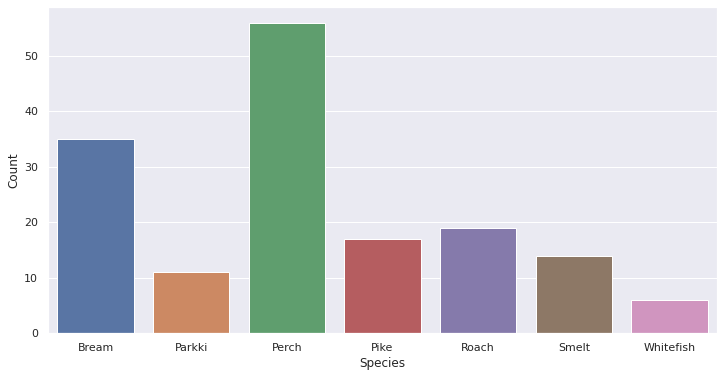

In [15]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Species", data=fishes);
ax.set_ylabel("Count")
plt.show()

*Observations*
* If the response variable were `Species` then this plot would tell use that we have an imbalanced dataset.

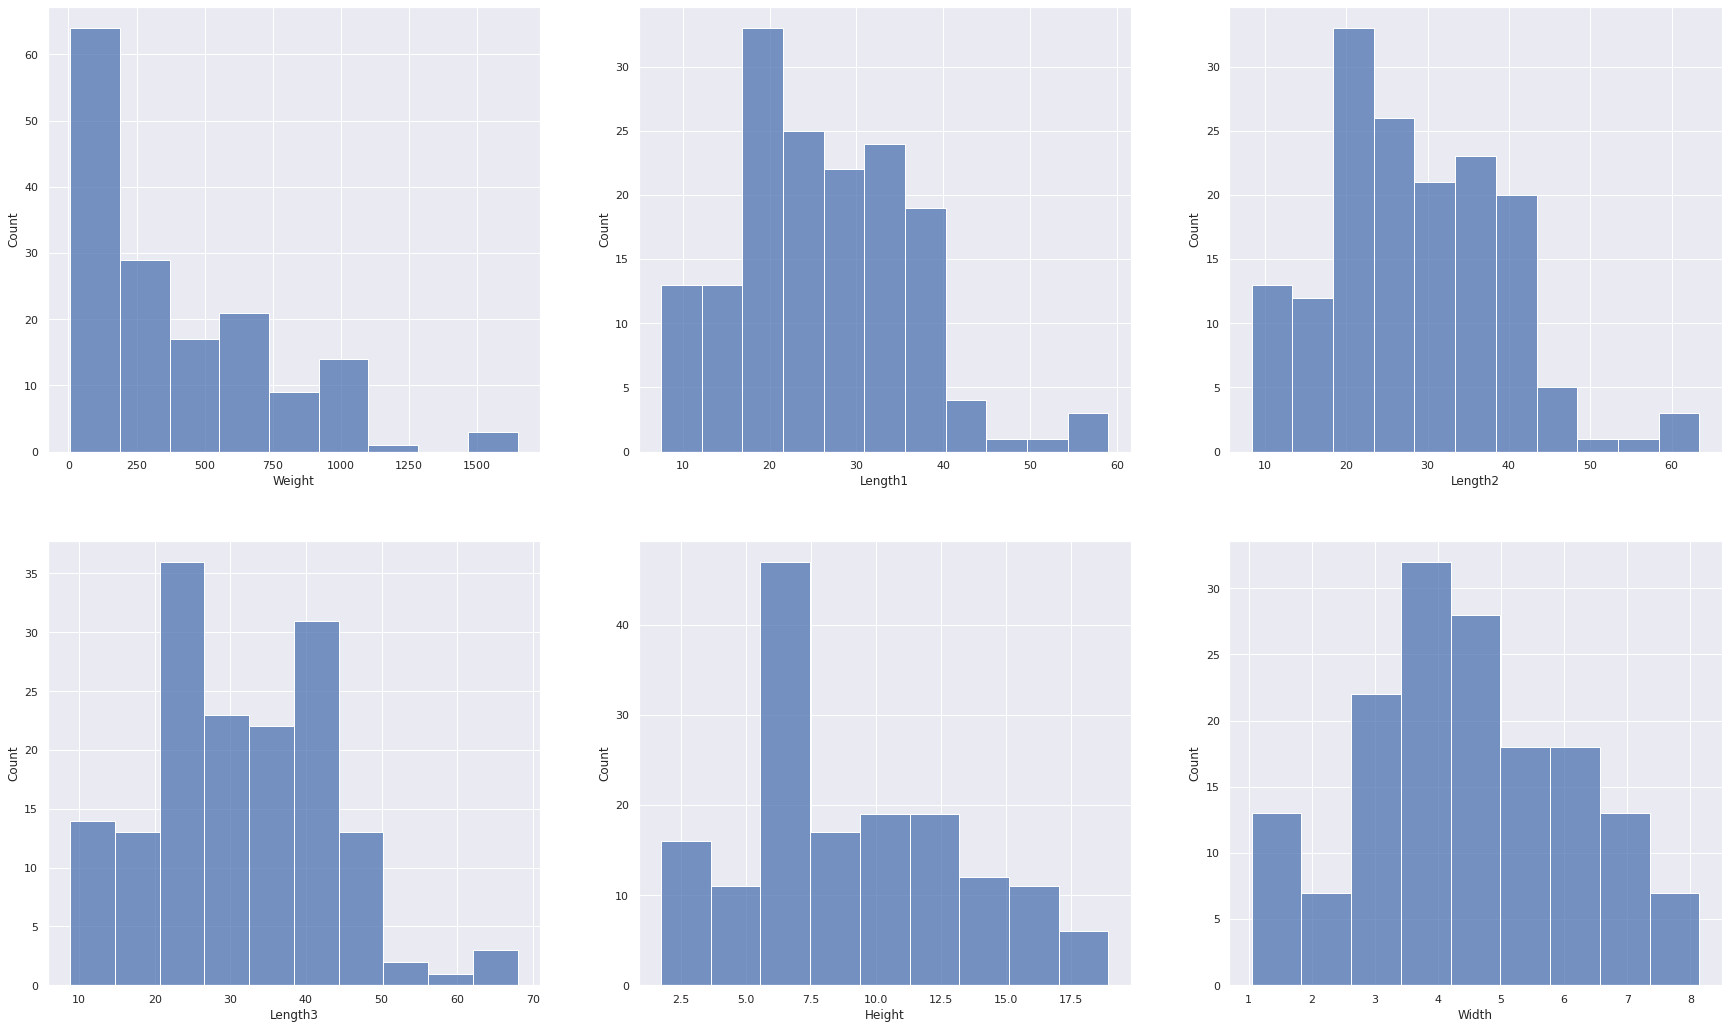

In [18]:
columns_for_hist = ['Weight','Length1','Length2','Length3','Height','Width']
fig, ax = plt.subplots(2, 3, squeeze=True, figsize=(30, 18))
for col, subplot in zip(columns_for_hist, ax.flatten()):
    sns.histplot(fishes, x=col, ax=subplot);

#### Relationships

First I'll explore correlations. In statistical terms, correlation is a method of assessing a possible two-way linear association between two continuous variables. 

**Pearson's Correlation**

The Pearson product-moment correlation attempts to draw a line of best fit through the data of two variables. The Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit (i.e., how well the data points fit this new model/line of best fit). The key assumptions of using this statistic are,

* Both variables being studied are normally distributed
* This coefficient is affected by extreme values, which may exaggerate or dampen the strength of relationship, and is therefore inappropriate when either or both variables are not normally distributed.

The condition of normal distribution isn't well satisfied from what we can see in the histograms above, but I examine the values for the purposes of understanding our problem.

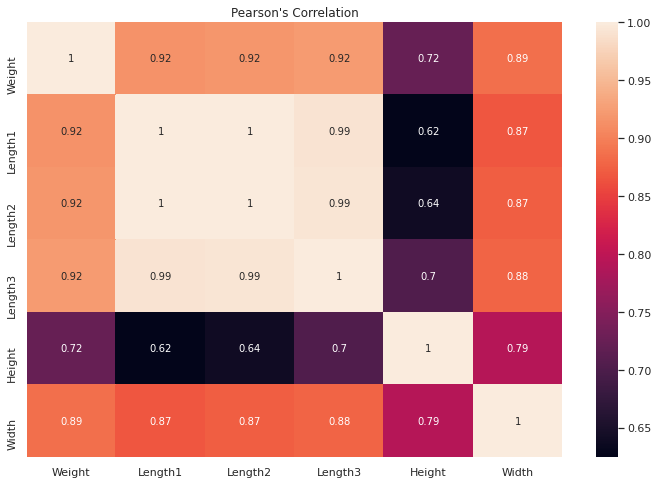

In [23]:
plt.figure(figsize=(12,8))
plt.title("Pearson's Correlation")
sns.heatmap(fishes.corr(), annot=True);
plt.show();

*Observations*
* The response variable, Weight, is most highly correlated with Length1, Length2 and Length3

**Spearmen's Correlation**



The key assumptions of using this statistic are,

* It is appropriate when one or both variables are skewed or ordinal1 and is robust when extreme values are present.

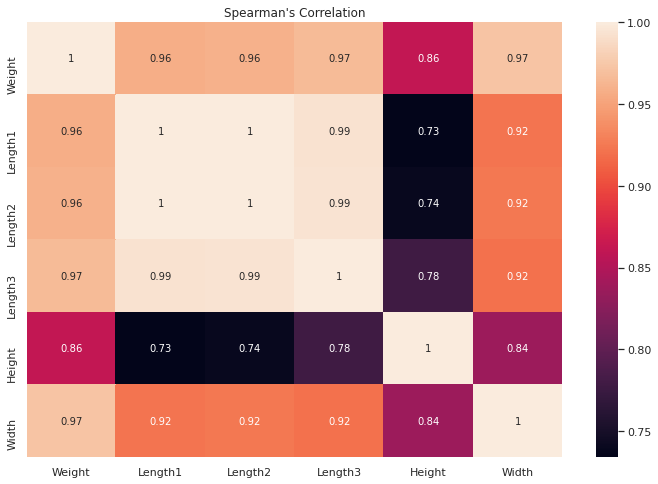

In [20]:
plt.figure(figsize=(12,8))
plt.title("Spearman's Correlation")
sns.heatmap(fishes.corr(method='spearman'), annot=True);
plt.show();

*Observations*
* In contrast to Pearson's correlation we see that highest correlation of Weight between Width and Length3. 

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Species', y='Weight', data=fishes);
plt.show();

In [ ]:
g = sns.pairplot(fishes, kind='scatter', hue='Species');